# Comparing the Compartmental Model SSA With SIR Euler

In [1]:
# !pip install ipympl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import output
# output.enable_custom_widget_manager()
# %matplotlib widget

In [3]:
s = 100
inf = 2
xinit = np.array([s, inf ,0])

In [4]:
from tqdm import tqdm
N = 5000
b = 2
gamma = 1/3
dt = 1/(b*(s+inf)+gamma*(s+inf))
print(dt)


0.004201680672268907


In [5]:
trials =10
all_states = list()

for _ in tqdm(range(trials)):
    states = np.zeros((N, 3))
    states[0, :] = xinit

    # wh have three possibilities
    for i in range(1,N):
        rate_inf = b*states[i-1, 0]*states[i-1, 1]/(inf+s)
        rate_recover = gamma*states[i-1,1]#/np.sum(states)
        prob_none = 1 - (rate_inf + rate_recover)*dt
        # print(prob_none)
        inf_inc = np.array((-1, 1, 0))
        rec_inc = np.array((0, -1, 1))
        none_inc = np.array((0, 0, 0))
        incs = [inf_inc, rec_inc, none_inc]
        # print([rate_inf*dt, rate_recover*dt, prob_none])
        irnd = np.random.choice((0, 1, 2), p = [rate_inf*dt, rate_recover*dt, prob_none])
        # print(irnd)
        states[i] = states[i-1] + incs[irnd]
    all_states.append(states)

100%|██████████| 10/10 [00:02<00:00,  4.11it/s]


In [6]:
# Implement Euler Method


dt_new = dt
# print(euler_states[0])
steps = int(N*dt/dt_new) +1
dt = dt_new
euler_states = np.zeros((steps,3))
euler_states[0, :] = xinit/(s+inf)
# steps = 5
gamma_sir = gamma#/(s+inf)
b_sir = b
for i in range(1,steps):
    euler_states[i,0] = euler_states[i-1,0] - (b_sir*euler_states[i-1,0]*euler_states[i-1,1])*dt
    euler_states[i,1] = euler_states[i-1,1] + (b_sir*euler_states[i-1,0]*euler_states[i-1,1] -gamma_sir*euler_states[i-1,1])*dt
    euler_states[i,2] = euler_states[i-1,2] + gamma_sir*euler_states[i-1,1]*dt
    if euler_states[i,0]<=0:
        euler_states[i,0] = 0
    if euler_states[i,1]<=0:
        euler_states[i,1] = 0
    if euler_states[i,2]<=0:
        euler_states[i,2] = 0

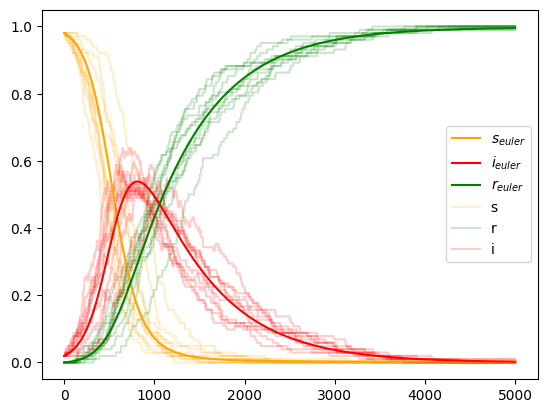

In [7]:
%matplotlib inline
plt.clf()
# %matplotlib widget


plt.clf()
for states in all_states[:-1]:
    plt.plot((states/(s+inf))[:,0], alpha = 0.2, color = 'orange')
    plt.plot((states/(s+inf))[:,2], alpha = 0.2, color = 'green')
    plt.plot((states/(s+inf))[:,1], alpha = 0.2, color = 'red')

plt.plot(euler_states[:,0], label = r'$s_{euler}$', color = 'orange')
plt.plot(euler_states[:,1], label = r'$i_{euler}$', color = 'red')
plt.plot(euler_states[:,2], label = r'$r_{euler}$', color = 'green')

plt.plot((all_states[-1]/(s+inf))[:,0], alpha = 0.2, label = 's', color = 'orange')
plt.plot((all_states[-1]/(s+inf))[:,2], alpha = 0.2, label = 'r', color = 'green')
plt.plot((all_states[-1]/(s+inf))[:,1], alpha = 0.2, label = 'i', color = 'red')
plt.legend()
plt.show()

In [8]:
bsh = 10
gsh = 10
bs = np.random.uniform(low = 1, high =bsh, size = (10,))
gammas = np.random.uniform(low = 1, high =gsh, size = (10,))

bless = list()
bhigh = list()
ball = list()
s = 100
inf = 2
xinit = np.array([s, inf ,0])
gamma_b_ratio = list()
for b_sir in bs:
    for gamma_sir in gammas:
        dt = 0.001
        # print(euler_states[0])
        steps = N#int(N*dt/dt_new) +1
        euler_states = np.zeros((steps,3))
        euler_states[0, :] = xinit/(s+inf)
        for i in range(1,steps):
            euler_states[i,0] = euler_states[i-1,0] - (b_sir*euler_states[i-1,0]*euler_states[i-1,1])*dt
            euler_states[i,1] = euler_states[i-1,1] + (b_sir*euler_states[i-1,0]*euler_states[i-1,1] -gamma_sir*euler_states[i-1,1])*dt
            euler_states[i,2] = euler_states[i-1,2] + gamma_sir*euler_states[i-1,1]*dt
            if euler_states[i,0]<=0:
                euler_states[i,0] = 0
            if euler_states[i,1]<=0:
                euler_states[i,1] = 0
            if euler_states[i,2]<=0:
                euler_states[i,2] = 0
        gamma_b_ratio.append(gamma_sir/b_sir)
        if gamma_sir>b_sir:
            bless.append(euler_states)
        if gamma_sir<=b_sir:
            bhigh.append(euler_states)
        ball.append(euler_states)

In [9]:
plots = {'s', 'i', 'r'}
every = 1000
lowlinestyle = 'dashdot'
colorslow = ['darkorange', 'tomato', 'magenta']
colorshigh = ['peru', 'red', 'midnightblue']
alpha_plot = 0.5



0
1
2
3
4
5
6
7
8
9


<Figure size 640x480 with 0 Axes>

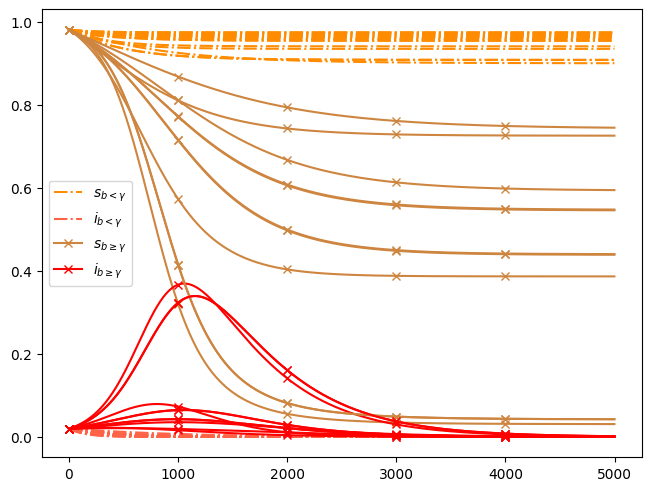

In [10]:
%matplotlib inline
plt.clf()
plots = {'s', 'i'} #, 'r'}
every = 1000
lowlinestyle = 'dashdot'
colorslow = ['darkorange', 'tomato', 'magenta']
colorshigh = ['peru', 'red', 'midnightblue']
alpha_plot = 0.5
markerh = 'x'
everyplot = 4
fig, axs = plt.subplots(nrows= 1, ncols =1, constrained_layout = True) #, bbox_inches = 'tight')
for euler_states in bless[::everyplot]:
    axs.plot(euler_states[:,0], markevery = every, linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
    axs.plot(euler_states[:,1], markevery = every, linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
    axs.plot(euler_states[:,2], markevery = every, linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None

axs.plot(euler_states[:,0], markevery = every,label = r'$s_{b<\gamma}$', linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
axs.plot(euler_states[:,1], markevery = every,label = r'$i_{b<\gamma}$', linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
axs.plot(euler_states[:,2], markevery = every,label = r'$r_{b<\gamma}$', linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None


count = 0
for euler_states in bhigh[::everyplot]:
    print(count)
    count+=1
    axs.plot(euler_states[:,0], markevery = every, marker = markerh, color = colorshigh[0]) if 's' in plots else None
    axs.plot(euler_states[:,1], markevery = every, marker = markerh, color = colorshigh[1]) if 'i' in plots else None
    axs.plot(euler_states[:,2], markevery = every, marker = markerh, color = colorshigh[2]) if 'r' in plots else None

axs.plot(euler_states[:,0], markevery = every,label = r'$s_{b\geq\gamma}$', marker = markerh, color = colorshigh[0]) if 's' in plots else None
axs.plot(euler_states[:,1], markevery = every,label = r'$i_{b\geq\gamma}$', marker = markerh, color = colorshigh[1]) if 'i' in plots else None
axs.plot(euler_states[:,2], markevery = every,label = r'$r_{b\geq\gamma}$', marker = markerh, color = colorshigh[2]) if 'r' in plots else None

plt.legend()
plt.show()

# When dow infection spread and when does it fall off?


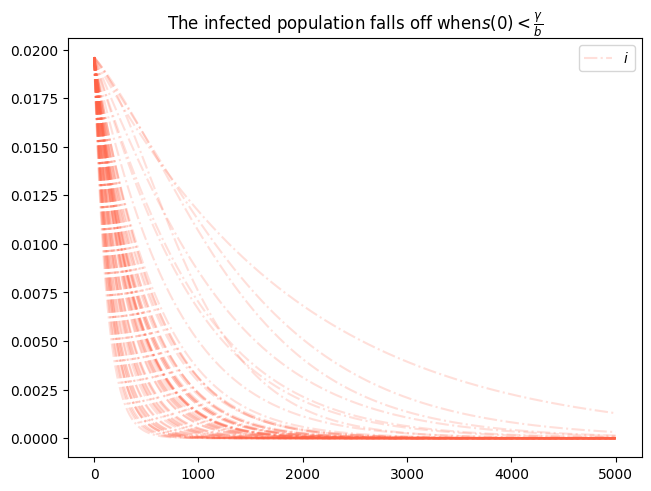

In [17]:
# %matplotlib inline
plt.clf()
plt.close()
fig, axs = plt.subplots(nrows= 1, ncols =1, constrained_layout = True) #, bbox_inches = 'tight')

s_0 = s/(s+inf)
gammabratio = np.array(gamma_b_ratio)

plots = {'i'} #, 'r'}
every = 1000
lowlinestyle = 'dashdot'
colorslow = ['darkorange', 'tomato', 'magenta']
colorshigh = ['peru', 'red', 'midnightblue']
alpha_plot = 0.2
markerh = 'x'
everyplot = 4
count = 0
for ratio, euler_states in zip(gammabratio, ball):
    if ratio>s_0:
        # print(f'{count}.) ratio: {ratio}, s0: {s_0}')
        axs.plot(euler_states[:,0], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
        axs.plot(euler_states[:,1], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
        axs.plot(euler_states[:,2], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None
    count+=1
axs.plot(euler_states[:,0], markevery = every,label = r'$s$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
axs.plot(euler_states[:,1], markevery = every,label = r'$i$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
axs.plot(euler_states[:,2], markevery = every,label = r'$r$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None
axs.set_title('The infected population falls off when ' + r'$s(0)<\frac{\gamma}{b}$')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

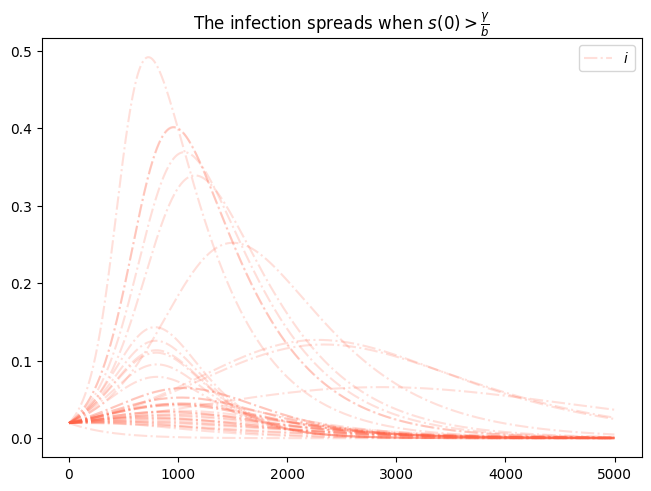

In [18]:



# %matplotlib notebook
plt.clf()

s_0 = s/(s+inf)
gammabratio = np.array(gamma_b_ratio)

plots = {'i'} #, 'r'}
every = 1000
lowlinestyle = 'dashdot'
colorslow = ['darkorange', 'tomato', 'magenta']
colorshigh = ['peru', 'red', 'midnightblue']
alpha_plot = 0.2
markerh = 'x'
everyplot = 4
fig, axs = plt.subplots(nrows= 1, ncols =1, constrained_layout = True) #, figsize = (20, 20)) #, bbox_inches = 'tight')
count = 0
for ratio, euler_states in zip(gammabratio, ball):
    if ratio<s_0:
        # print(f'{count}.) ratio: {ratio}, s0: {s_0}, checkcondition: {np.any(euler_states[1:,1]>euler_states[0,1])}')
        axs.plot(euler_states[:,0], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
        axs.plot(euler_states[:,1], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
        axs.plot(euler_states[:,2], markevery = every, alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None
    count+=1
axs.plot(euler_states[:,0], markevery = every,label = r'$s$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[0]) if 's' in plots else None
axs.plot(euler_states[:,1], markevery = every,label = r'$i$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[1]) if 'i' in plots else None
axs.plot(euler_states[:,2], markevery = every,label = r'$r$', alpha = alpha_plot, linestyle = lowlinestyle, color = colorslow[2]) if 'r' in plots else None
axs.set_title('The infection spreads when ' + r'$s(0)>\frac{\gamma}{b}$')
plt.legend()
plt.show()